In [1]:
import os
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from scipy import stats
import plotly.express as px
import toml
import psrc_theme

%matplotlib inline
from IPython.display import display, HTML

# to show plotly figures in quarto HTML file
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
pio.templates.default = "simple_white+psrc_color" # set plotly template

input_config = toml.load(os.path.join(os.getcwd(), '..\\..\\..\\..\\configuration', 'input_configuration.toml'))
valid_config = toml.load(os.path.join(os.getcwd(), '..\\..\\..\\..\\configuration', 'validation_configuration.toml'))
emme_config = toml.load(os.path.join(os.getcwd(), '..\\..\\..\\..\\configuration','emme_configuration.toml'))
network_config = toml.load(os.path.join(os.getcwd(), '..\\..\\..\\..\\configuration','network_configuration.toml'))

# create connection
conn = create_engine('sqlite:///inputs/db/'+input_config['db_name'])

# summary data location
csv_path = os.path.join(valid_config['model_dir'], 'outputs/validation')

# table format
pd.options.display.float_format = '{:0,.2f}'.format
format_percent = "{:,.2%}".format

## daily traffic counts

In [2]:
df = pd.read_csv(os.path.join(csv_path, 'daily_volume.csv'))
df[['modeled', 'observed']] = df[['modeled', 'observed']].astype('float')
_df = df.groupby('@facilitytype').sum()[['observed', 'modeled']]
_df.loc['Total', :] = _df.sum().values
_df['diff'] = _df['modeled'] - _df['observed']
_df['percent_diff'] = _df['diff'] / _df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"25,761,351.00","22,633,709.00","-3,127,642.00",-12.14%
Collector,"4,378,889.00","3,379,107.00","-999,782.00",-22.83%
Freeway,"28,073,146.00","29,225,458.00","1,152,312.00",4.10%
Ramp,"756,602.00","618,834.00","-137,768.00",-18.21%
Total,"58,969,988.00","55,857,108.00","-3,112,880.00",-5.28%


In [3]:
df = pd.read_csv(os.path.join(csv_path,'daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,168,323.00","30,723,890.00","-444,433.00",-1.43%
Kitsap,"4,567,541.00","3,681,479.00","-886,062.00",-19.40%
Pierce,"13,634,217.00","12,854,092.00","-780,125.00",-5.72%
Snohomish,"9,599,907.00","8,597,647.00","-1,002,260.00",-10.44%
Total,"58,969,988.00","55,857,108.00","-3,112,880.00",-5.28%


## daily traffic scatterplot

C:\ProgramData\Anaconda3\envs\joanne\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



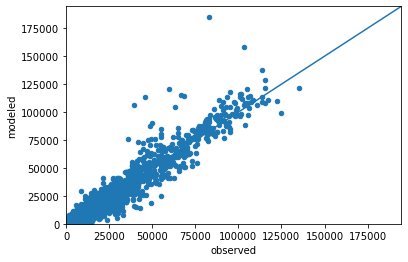

In [4]:
df = pd.read_csv(os.path.join(csv_path,'daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [5]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.959849841941866


King r^2: 0.9701943355308248


Kitsap r^2: 0.950549038146256
Pierce r^2: 0.9415353782356389


Snohomish r^2: 0.9564462815240714


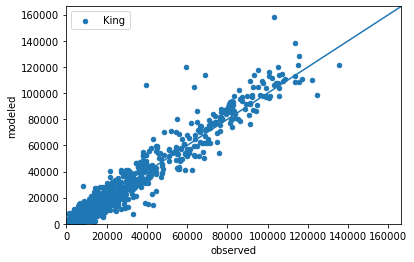

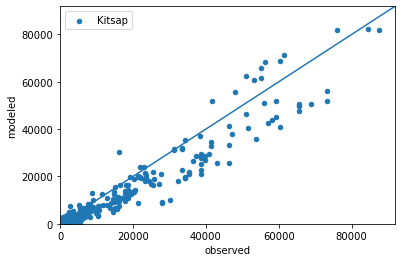

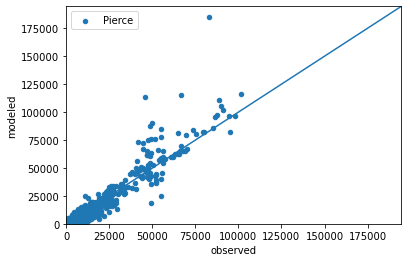

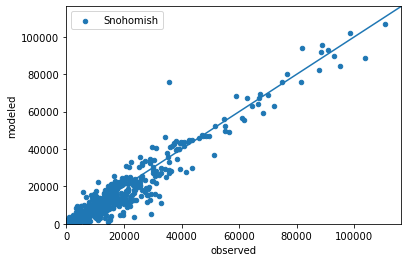

In [6]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

r^2 Freeway: 0.9044971809308516
r^2 Arterial: 0.8753436965372147


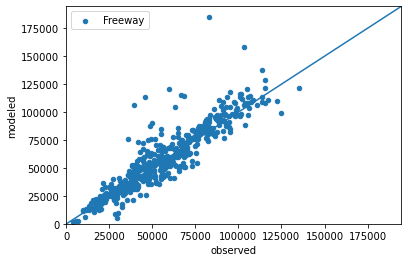

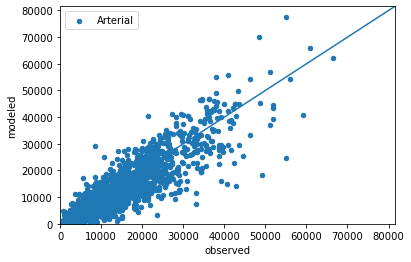

In [7]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

## hourly volumnes

r^2: 0.9003030444587246


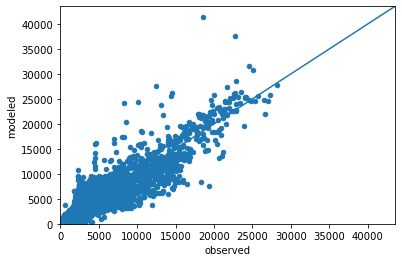

In [8]:
df = pd.read_csv(os.path.join(csv_path,'hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

## screenlines

In [9]:
df = pd.read_csv(os.path.join(csv_path,'screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"582,116.00","538,663.41",King,"-43,452.59",-7.46%
1,KENT,"552,442.00","505,041.40",King,"-47,400.60",-8.58%
2,SEATTLE - SOUTH OF CBD,"473,322.00","515,290.48",King,"41,968.48",8.87%
3,SHIP CANAL,"434,069.00","566,136.83",King,"132,067.83",30.43%
4,SOUTH BELLEVUE,"389,700.00","361,373.96",King,"-28,326.04",-7.27%
5,MILL CREEK,"387,047.00","382,654.55",King,"-4,392.45",-1.13%
6,KIRKLAND-REDMOND,"381,663.00","421,285.20",King,"39,622.20",10.38%
7,SEATTLE - NORTH,"341,251.00","384,578.80",King,"43,327.80",12.70%
8,TACOMA - EAST OF CBD,"300,463.00","348,163.49",Pierce,"47,700.49",15.88%
9,PARKLAND,"297,722.00","278,277.29",Pierce,"-19,444.71",-6.53%


C:\ProgramData\Anaconda3\envs\joanne\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



r^2 : 0.9746799704990533


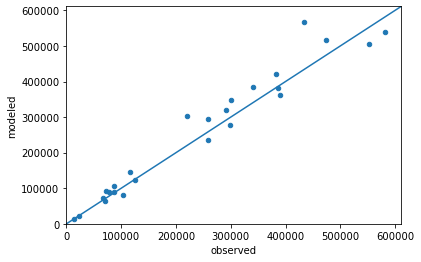

In [10]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))